# Predict Your Study Productivity
---

## SetUp del proyecto (No editar)

In [13]:
# Lista de librerías necesarias
required_packages = [
    "pandas",
    "numpy",
    "scikit-learn",
    "matplotlib",
    "joblib"
]

import importlib
import subprocess
import sys

def install_if_missing(package):
    try:
        importlib.import_module(package.replace("-", "_"))
        print(f"- {package} ya está instalado.")
    except ImportError:
        print(f"Instalando {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"- {package} instalado correctamente.")

# Instalar todas las dependencias
for pkg in required_packages:
    install_if_missing(pkg)

print("\n Setup completado. Ya puedes continuar con el notebook.")

- pandas ya está instalado.
- numpy ya está instalado.
Instalando scikit-learn...
- scikit-learn instalado correctamente.
- matplotlib ya está instalado.
- joblib ya está instalado.

 Setup completado. Ya puedes continuar con el notebook.


---
## Importar librerías y configuración general

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    accuracy_score,
    classification_report
)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

plt.style.use("ggplot")  # estilo visual más limpio

---
## Carga del dataset

In [35]:
df = pd.read_csv("productividad_estudio.csv")

print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,horas_sueño,tiempo_estudio,distracción,energía,dificultad,uso_móvil,ruido_ambiente,descanso_previo,estado_ánimo,productividad_final,productividad_clase
0,7,120,3,4,3,15,2,si,4,4,NaN
1,6,90,5,3,4,20,5,no,3,3,NaN
2,8,150,2,5,2,5,1,si,5,5,NaN
3,5,60,6,2,4,30,7,no,2,2,NaN
4,7,180,1,4,3,10,3,si,4,5,NaN


---
## Preprocesamiento de los datos

In [36]:
# Convertir categóricas a numérico
print(df.columns)
if "descanso_previo" in df.columns:
    df["descanso_previo"] = df["descanso_previo"].map({"si": 1, "no": 0})

# Crear variable de clasificación si existe la columna principal
if "productividad_final" in df.columns and df.shape[0] > 0:
    def clasificar(x):
        if x <= 2: return "bajo"
        elif x == 3: return "medio"
        else: return "alto"
    df["productividad_clase"] = df["productividad_final"].apply(clasificar)

df.head()

Index(['horas_sueño', 'tiempo_estudio', 'distracción', 'energía', 'dificultad',
       'uso_móvil', 'ruido_ambiente', 'descanso_previo', 'estado_ánimo',
       'productividad_final', 'productividad_clase'],
      dtype='object')


,horas_sueño,tiempo_estudio,distracción,energía,dificultad,uso_móvil,ruido_ambiente,descanso_previo,estado_ánimo,productividad_final,productividad_clase
0,7,120,3,4,3,15,2,1,4,4,alto
1,6,90,5,3,4,20,5,0,3,3,medio
2,8,150,2,5,2,5,1,1,5,5,alto
3,5,60,6,2,4,30,7,0,2,2,bajo
4,7,180,1,4,3,10,3,1,4,5,alto


---
## Análisis Exploratorio

Descripción estadística:


,horas_sueño,tiempo_estudio,distracción,energía,dificultad,uso_móvil,ruido_ambiente,descanso_previo,estado_ánimo,productividad_final
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,6.400000,115.000000,3.60000,3.400000,3.300000,17.500000,3.800000,0.500000,3.500000,3.500000
std,1.264911,49.328829,2.01108,1.264911,0.948683,10.341395,2.529822,0.527046,1.080123,1.354006
min,4.000000,45.000000,1.00000,1.000000,2.000000,5.000000,0.000000,0.000000,2.000000,1.000000
25%,6.000000,91.250000,2.25000,3.000000,3.000000,10.000000,2.250000,0.000000,3.000000,3.000000
50%,6.500000,105.000000,3.50000,3.500000,3.000000,17.500000,3.500000,0.500000,3.500000,3.500000
75%,7.000000,142.500000,4.75000,4.000000,4.000000,23.750000,5.000000,1.000000,4.000000,4.750000
max,8.000000,200.000000,7.00000,5.000000,5.000000,35.000000,8.000000,1.000000,5.000000,5.000000


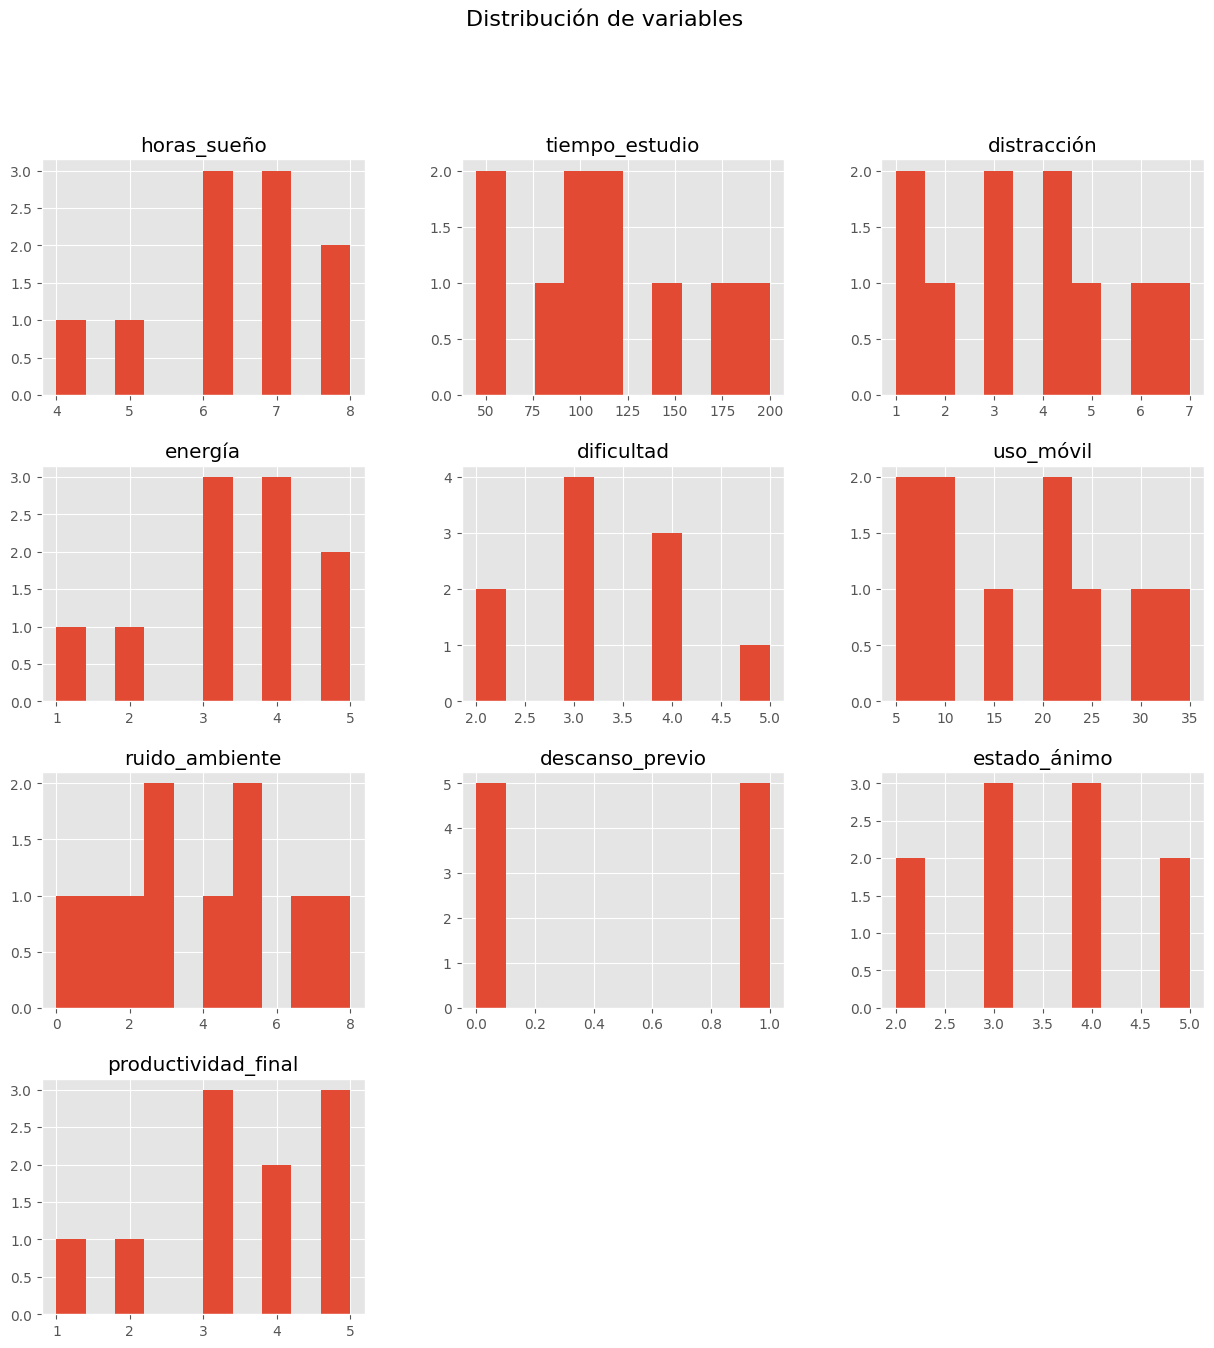

In [42]:
print("Descripción estadística:")
display(df.describe())

# Histograma general
df.hist(figsize=(15, 15))
plt.suptitle("Distribución de variables", fontsize=16)
plt.show()

---
## Modelo de Regresión

MAE (Regresión): 0.140


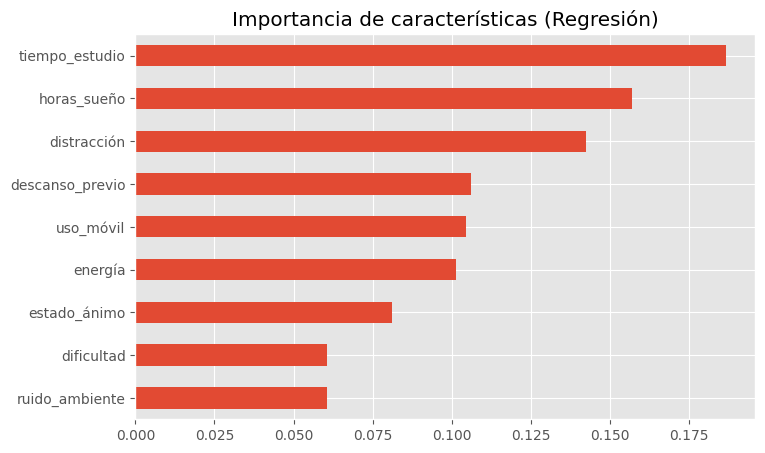

In [38]:
if df.shape[0] > 5:

    features = [
        "horas_sueño", "tiempo_estudio", "distracción", "energía",
        "dificultad", "uso_móvil", "ruido_ambiente",
        "descanso_previo", "estado_ánimo"
    ]

    X = df[features]
    y = df["productividad_final"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model_reg = RandomForestRegressor(random_state=42)
    model_reg.fit(X_train, y_train)

    preds = model_reg.predict(X_test)
    mae = mean_absolute_error(y_test, preds)

    print(f"MAE (Regresión): {mae:.3f}")

    # Importancia de variables
    importancias = pd.Series(model_reg.feature_importances_, index=features)
    importancias.sort_values().plot(kind="barh", figsize=(8, 5))
    plt.title("Importancia de características (Regresión)")
    plt.show()

else:
    print("No hay suficientes datos para entrenar el modelo de regresión.")

---
## Modelo de Clasificación

In [39]:
if df.shape[0] > 5:

    X = df[features]
    y = df["productividad_clase"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model_clf = RandomForestClassifier(random_state=42)
    model_clf.fit(X_train, y_train)

    preds = model_clf.predict(X_test)
    acc = accuracy_score(y_test, preds)

    print(f"Accuracy (Clasificación): {acc:.2f}")
    print("\nReporte completo:")
    print(classification_report(y_test, preds))

else:
    print("No hay suficientes datos para entrenar clasificación.")

Accuracy (Clasificación): 1.00

Reporte completo:
              precision    recall  f1-score   support

        alto       1.00      1.00      1.00         1
       medio       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



---
## Función de predicción manual

In [40]:
def predecir(horas_sueño, tiempo_estudio, distraccion, energia,
             dificultad, uso_movil, ruido_ambiente, descanso_previo,
             estado_animo):

    datos = np.array([[
        horas_sueño, tiempo_estudio, distraccion, energia,
        dificultad, uso_movil, ruido_ambiente,
        1 if descanso_previo == "sí" else 0,
        estado_animo
    ]])

    pred_reg = model_reg.predict(datos)[0]
    pred_clf = model_clf.predict(datos)[0]

    return pred_reg, pred_clf

---
## Guardar modelos

In [43]:
import joblib

joblib.dump(model_reg, "modelo_regresion.pkl")
joblib.dump(model_clf, "modelo_clasificacion.pkl")

print("Modelos guardados correctamente.")

Modelos guardados correctamente.
